# INSY695 Group Project

## Step 2: Data Exploration

After aggregating all the datasets, we then start exploring the data.

In [ ]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import shap
               

In [ ]:
!pip install shap

## 2.1 <b>Import Dataset</b>

In [ ]:
data = pd.read_csv("combined_data.csv")

## 2.2 <b>Check How Data Look Like</b>

In [ ]:
data.shape # 52610 rows, 29 columns

(52610, 30)

In [ ]:
data.head()

,Unnamed: 0,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,type,date_time_GMT,home_rink_side_start,venue,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalie_replacement
0,0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,R,2016-10-19T00:30:00Z,right,United Center,America/Chicago,-5,CDT,990.833333,841.388889,55.555556,93.888889,Yes
1,1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,R,2016-10-19T00:30:00Z,right,United Center,America/Chicago,-5,CDT,981.333333,836.777778,75.111111,69.444444,No
2,2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right,R,2018-02-07T00:00:00Z,left,KeyBank Center,America/New_York,-4,EDT,1002.222222,879.611111,28.444444,94.166667,No
3,3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right,R,2018-02-07T00:00:00Z,left,KeyBank Center,America/New_York,-4,EDT,999.222222,888.333333,75.333333,35.555556,No
4,4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left,R,2015-11-24T01:00:00Z,right,MTS Centre,America/Winnipeg,-5,CDT,986.666667,844.722222,53.333333,88.611111,No


## 2.3 Check Missing Values

In [ ]:
data.isnull().sum()

Unnamed: 0                    0
game_id                       0
team_id                       0
HoA                           0
won                           0
settled_in                    0
head_coach                   28
goals                         8
shots                         8
hits                       4928
pim                           8
powerPlayOpportunities        8
powerPlayGoals                8
faceOffWinPercentage      22148
giveaways                  4928
takeaways                  4928
blocked                    4928
startRinkSide              2392
type                          0
date_time_GMT                 0
home_rink_side_start       2392
venue                         0
venue_time_zone_id            0
venue_time_zone_offset        0
venue_time_zone_tz            0
timeOnIce                    28
evenTimeOnIce                28
shortHandedTimeOnIce         28
powerPlayTimeOnIce           28
goalie_replacement           35
dtype: int64

## 2.4 <b>Remove Irrelevant Column</b>

In [ ]:
data = data.drop(columns='Unnamed: 0')

In [ ]:
data.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,type,date_time_GMT,home_rink_side_start,venue,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalie_replacement
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,R,2016-10-19T00:30:00Z,right,United Center,America/Chicago,-5,CDT,990.833333,841.388889,55.555556,93.888889,Yes
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,R,2016-10-19T00:30:00Z,right,United Center,America/Chicago,-5,CDT,981.333333,836.777778,75.111111,69.444444,No
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right,R,2018-02-07T00:00:00Z,left,KeyBank Center,America/New_York,-4,EDT,1002.222222,879.611111,28.444444,94.166667,No
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right,R,2018-02-07T00:00:00Z,left,KeyBank Center,America/New_York,-4,EDT,999.222222,888.333333,75.333333,35.555556,No
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left,R,2015-11-24T01:00:00Z,right,MTS Centre,America/Winnipeg,-5,CDT,986.666667,844.722222,53.333333,88.611111,No


## 2.5 <b>Check Variable Types</b>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

In [ ]:
#Generate a HTML report
#import pandas_profiling
#profile = data.profile_report(title='Pandas Profiling Report')
#profile

#profile.to_file(output_file="profile_report_output.html")

# 2.6 <b>Examine Data Distribution of Each Variable<b/>

In this section, we use histograms to look at the distribution of numeric variables. For categorical variables, we count the frequency of each value.

In [ ]:
data["HoA"].value_counts()

away    26305
home    26305
Name: HoA, dtype: int64

In [ ]:
data["won"].value_counts()

False    26947
True     25663
Name: won, dtype: int64

In [ ]:
data["settled_in"].value_counts()

REG    40306
OT     12256
tbc       48
Name: settled_in, dtype: int64

In [ ]:
data["head_coach"].value_counts()

Barry Trotz         1804
Joel Quenneville    1599
John Tortorella     1563
Claude Julien       1500
Mike Babcock        1475
                    ... 
Al Arbour              1
Dan Lacroix            1
Cap Raeder             1
Terry O'Reilly         1
Martin Raymond         1
Name: head_coach, Length: 146, dtype: int64

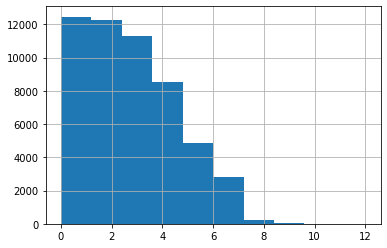

In [ ]:
data["goals"].hist()


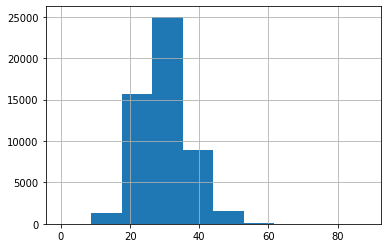

In [ ]:
data["shots"].hist()

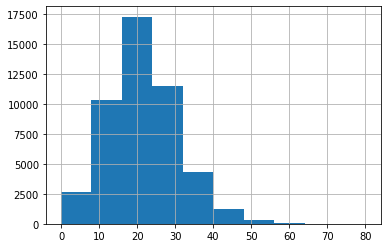

In [ ]:
data["hits"].hist()

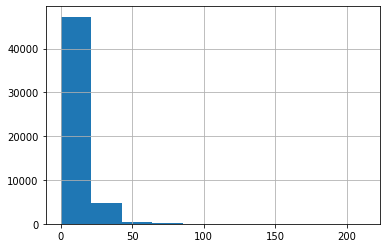

In [ ]:
data["pim"].hist()

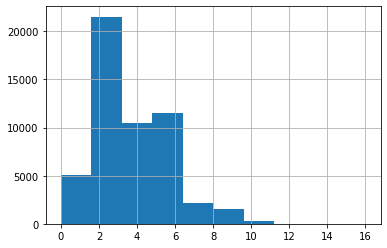

In [ ]:
data["powerPlayOpportunities"].hist()

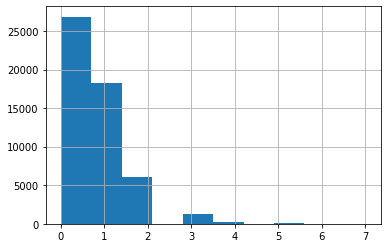

In [ ]:
data["powerPlayGoals"].hist()

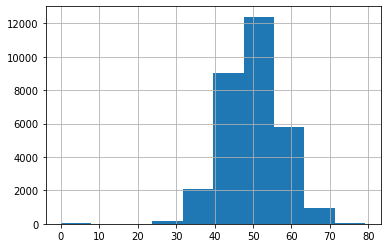

In [ ]:
data["faceOffWinPercentage"].hist()

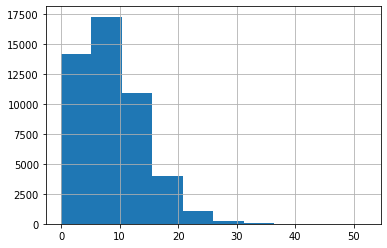

In [ ]:
data["giveaways"].hist()

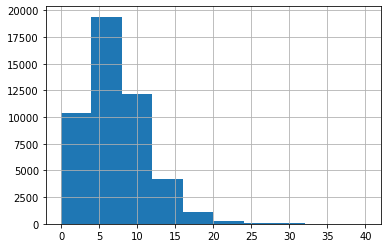

In [ ]:
data["takeaways"].hist()

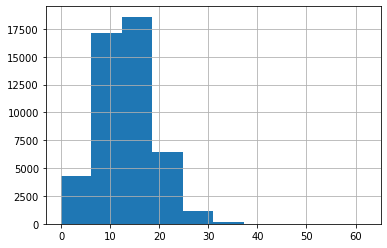

In [ ]:
data["blocked"].hist()

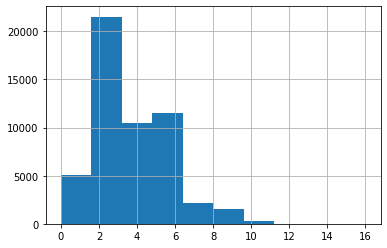

In [ ]:
data["powerPlayOpportunities"].hist()

In [ ]:
data["startRinkSide"].value_counts()

left     26852
right    23366
Name: startRinkSide, dtype: int64

In [ ]:
data["type"].value_counts()

R    50342
P     2248
A       20
Name: type, dtype: int64

In [ ]:
# Check the format of variable "date_time_GMT"
data["date_time_GMT"].value_counts()

2019-11-28T00:00:00Z    32
2018-12-02T00:00:00Z    28
2020-02-05T00:00:00Z    28
2019-11-24T00:00:00Z    28
2020-01-17T00:00:00Z    28
                        ..
2010-02-14T01:30:00Z     2
2010-01-15T01:00:00Z     2
2010-03-28T01:00:00Z     2
2009-10-11T01:00:00Z     2
2008-01-16T02:00:00Z     2
Name: date_time_GMT, Length: 14468, dtype: int64

In [ ]:
# Extract value of year from variable "data_time_GMT"
data['year']=""
for i in range(52610):
    data['year'][i]=data['date_time_GMT'][i][0:4]

2019    5492
2018    3948
2013    2814
2017    2738
2015    2658
2011    2638
2016    2624
2009    2560
2014    2540
2001    2502
2006    2480
2007    2460
2003    2454
2002    2402
2008    2402
2020    2386
2010    2382
2012    1514
2004    1354
2005    1134
2000    1128
Name: year, dtype: int64


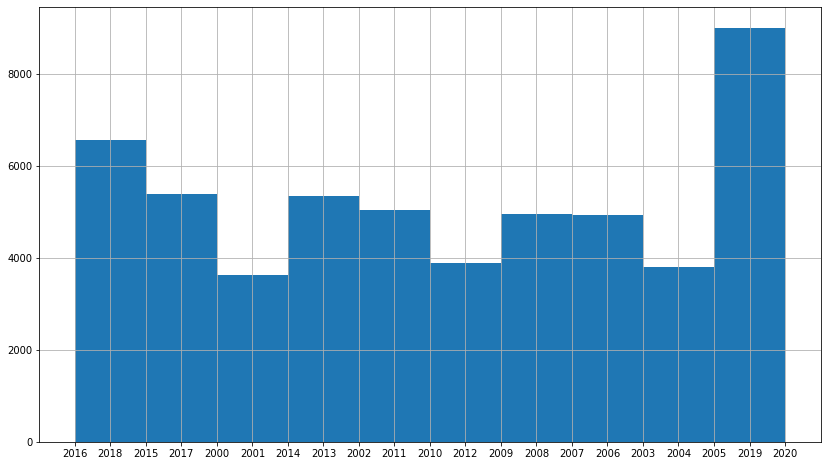

In [ ]:
# Check distribution of "year"
print(data["year"].value_counts())
data["year"].hist(figsize=(14,8))


In [ ]:
# Extract value of month from variable "data_time_GMT"
data['month']=""
for i in range(52610):
    data['month'][i]=data['date_time_GMT'][i][5:7]

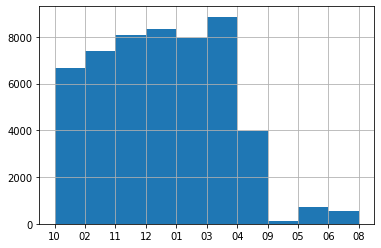

In [ ]:
# Check distribution of "year"
data["month"].hist()

In [ ]:
data["home_rink_side_start"].value_counts()

right    26852
left     23366
Name: home_rink_side_start, dtype: int64

In [ ]:
data["venue"].value_counts()

Madison Square Garden    1764
United Center            1742
Nationwide Arena         1702
Xcel Energy Center       1702
Pepsi Center             1682
                         ... 
TCF Bank Stadium            2
Wrigley Field               2
McMahon Stadium             2
Fenway Park                 2
Coors Field                 2
Name: venue, Length: 116, dtype: int64

In [ ]:
data["venue_time_zone_id"].value_counts()

America/New_York       23480
America/Chicago         8788
America/Los_Angeles     5756
America/Denver          3426
America/Vancouver       1740
America/Montreal        1738
America/Detroit         1712
America/Toronto         1702
America/Phoenix         1694
America/Edmonton        1678
America/Winnipeg         896
Name: venue_time_zone_id, dtype: int64

In [ ]:
data["venue_time_zone_offset"].value_counts()

-4    23994
-5    12610
-7     8600
-6     5972
-8     1434
Name: venue_time_zone_offset, dtype: int64

In [ ]:
data["venue_time_zone_tz"].value_counts()

EDT    23994
CDT     7972
PDT     6062
EST     4638
MDT     4260
MST     2538
CST     1712
PST     1434
Name: venue_time_zone_tz, dtype: int64

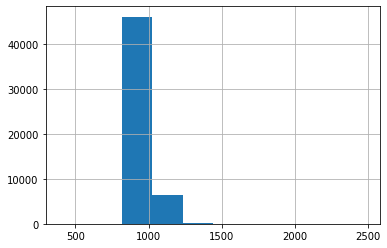

In [ ]:
data["timeOnIce"].hist()

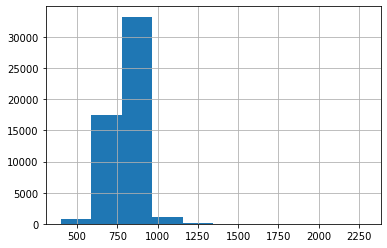

In [ ]:
data["evenTimeOnIce"].hist()

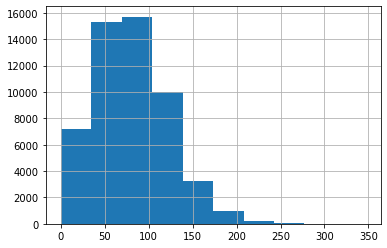

In [ ]:
data["shortHandedTimeOnIce"].hist()

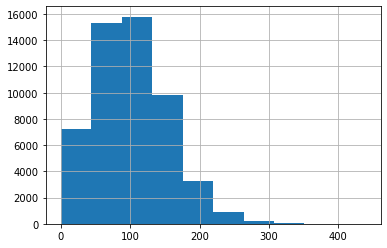

In [ ]:
data["powerPlayTimeOnIce"].hist()

In [ ]:
data["goalie_replacement"].value_counts()

No     48498
Yes     4077
Name: goalie_replacement, dtype: int64

## 2.7 <b>Check Outliers for Numeric Values</b>

In this section, we use boxplots to observe how many outliers there are for each variable.

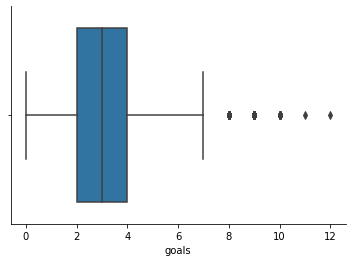

In [ ]:
import seaborn as sns 
sns.boxplot(data['goals']) 
sns.despine()

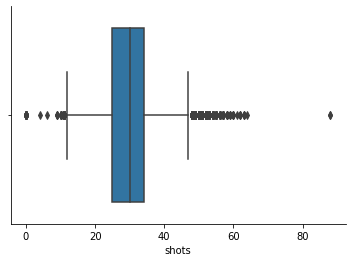

In [ ]:
sns.boxplot(data['shots']) 
sns.despine()

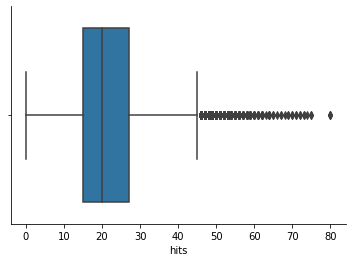

In [ ]:
sns.boxplot(data['hits']) 
sns.despine()

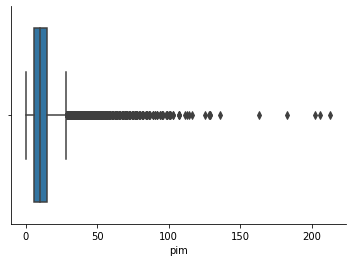

In [ ]:
sns.boxplot(data['pim']) 
sns.despine()

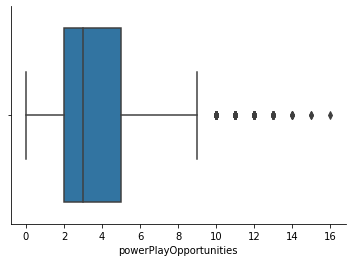

In [ ]:
sns.boxplot(data['powerPlayOpportunities']) 
sns.despine()

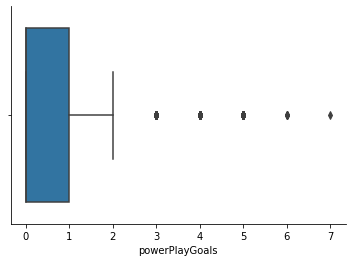

In [ ]:
sns.boxplot(data['powerPlayGoals']) 
sns.despine()

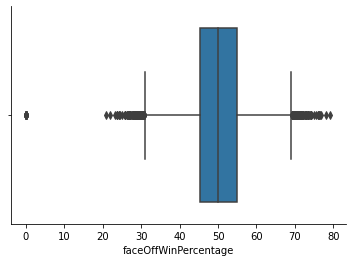

In [ ]:
sns.boxplot(data['faceOffWinPercentage']) 
sns.despine()

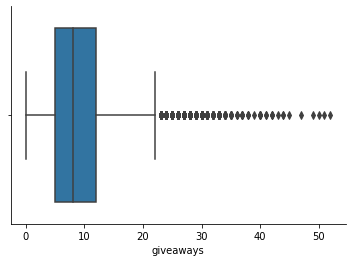

In [ ]:
sns.boxplot(data['giveaways']) 
sns.despine()

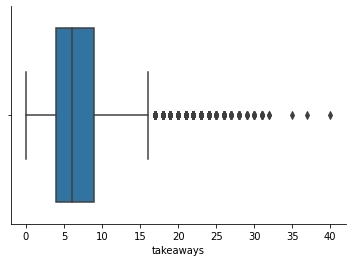

In [ ]:
sns.boxplot(data['takeaways']) 
sns.despine()

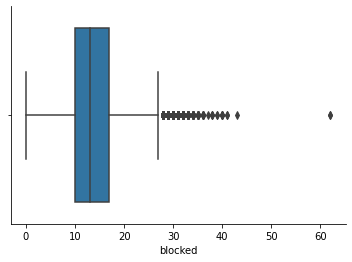

In [ ]:
sns.boxplot(data['blocked']) 
sns.despine()

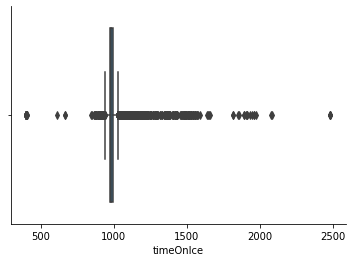

In [ ]:
sns.boxplot(data['timeOnIce']) 
sns.despine()

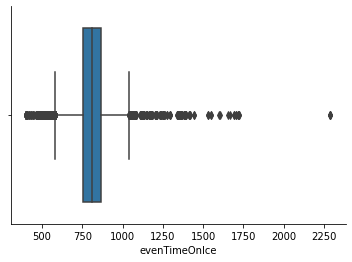

In [ ]:
sns.boxplot(data['evenTimeOnIce']) 
sns.despine()

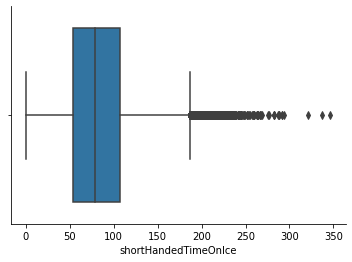

In [ ]:
sns.boxplot(data['shortHandedTimeOnIce']) 
sns.despine()

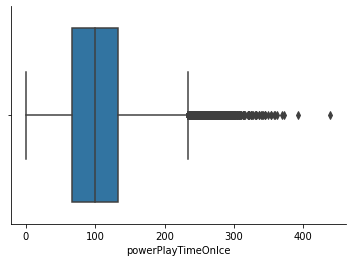

In [ ]:
sns.boxplot(data['powerPlayTimeOnIce']) 
sns.despine()

## 2.8 <b>Check Relationships between Variables</b>

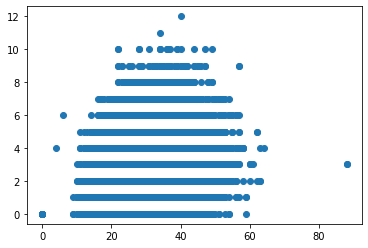

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['shots'], data['goals'])

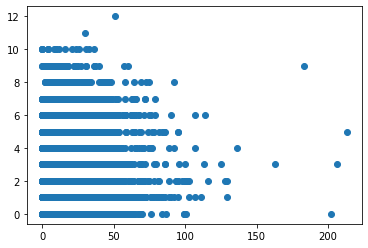

In [ ]:
plt.scatter(data['pim'], data['goals'])

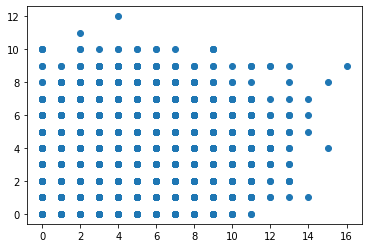

In [ ]:
plt.scatter(data['powerPlayOpportunities'], data['goals'])

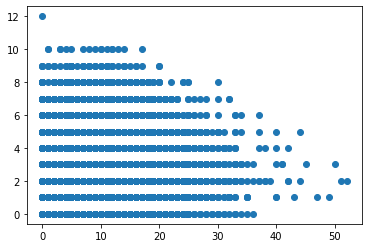

In [ ]:
plt.scatter(data['giveaways'], data['goals'])

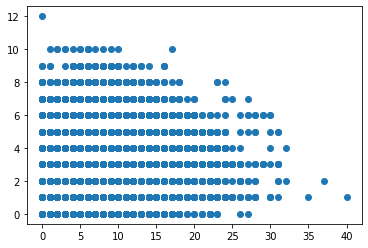

In [ ]:
plt.scatter(data['takeaways'], data['goals'])

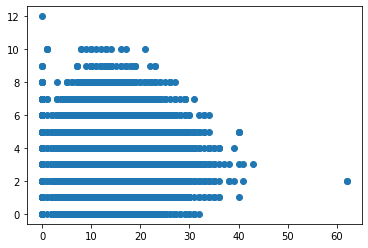

In [ ]:
plt.scatter(data['blocked'], data['goals'])

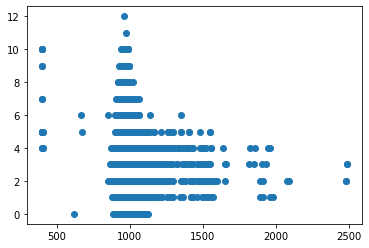

In [ ]:
plt.scatter(data['timeOnIce'], data['goals'])

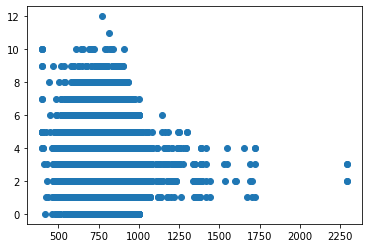

In [ ]:
plt.scatter(data['evenTimeOnIce'], data['goals'])

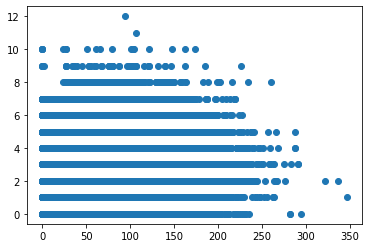

In [ ]:
plt.scatter(data['shortHandedTimeOnIce'], data['goals'])

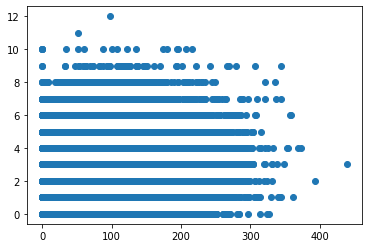

In [ ]:
plt.scatter(data['powerPlayTimeOnIce'], data['goals'])

## 2.9 Check Correlations among Variables

<b>Correlation Matrix</b>

In [ ]:
data.corr()

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,venue_time_zone_offset,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
game_id,1.000000,0.122000,0.035644,0.037271,0.154728,0.342978,-0.282431,-0.344502,-0.092124,-0.001894,0.133770,0.145461,0.278443,-0.200089,0.112090,0.377174,-0.319614,-0.320463
team_id,0.122000,1.000000,-0.001185,-0.007874,-0.019162,0.011246,-0.044171,-0.032043,-0.014289,0.009204,-0.028017,-0.002926,-0.005821,-0.455311,-0.032154,0.016848,-0.035961,-0.027887
won,0.035644,-0.001185,1.000000,0.596658,0.025200,-0.039339,-0.040231,0.014049,0.240823,0.030458,-0.004803,0.104937,0.166406,-0.001869,-0.061166,-0.014459,0.027564,-0.046930
goals,0.037271,-0.007874,0.596658,1.000000,0.150048,-0.064944,0.038303,0.097074,0.459827,0.035202,0.012130,0.095462,0.093338,-0.005184,-0.075527,-0.045709,0.036049,-0.010313
shots,0.154728,-0.019162,0.025200,0.150048,1.000000,0.050009,-0.082409,0.120679,0.083634,0.138162,0.048839,0.099960,-0.074203,0.008603,0.196708,0.098488,-0.164846,0.119446
hits,0.342978,0.011246,-0.039339,-0.064944,0.050009,1.000000,-0.062390,-0.187209,-0.073287,0.003448,0.202028,0.165264,0.291648,-0.014920,0.188226,0.253318,-0.133942,-0.182580
pim,-0.282431,-0.044171,-0.040231,0.038303,-0.082409,-0.062390,1.000000,0.290575,0.125317,-0.008737,-0.067719,-0.068962,-0.063378,0.045888,-0.219771,-0.473263,0.531020,0.233566
powerPlayOpportunities,-0.344502,-0.032043,0.014049,0.097074,0.120679,-0.187209,0.290575,1.000000,0.416477,0.045209,-0.011836,-0.059365,-0.163430,0.047011,-0.102390,-0.699930,0.291043,0.921578
powerPlayGoals,-0.092124,-0.014289,0.240823,0.459827,0.083634,-0.073287,0.125317,0.416477,1.000000,0.024791,-0.001385,0.014879,0.008025,0.010598,-0.062093,-0.211025,0.141753,0.209193
faceOffWinPercentage,-0.001894,0.009204,0.030458,0.035202,0.138162,0.003448,-0.008737,0.045209,0.024791,1.000000,0.068740,0.059343,-0.080402,0.001420,0.006000,-0.000322,-0.031742,0.032160


<b>Correlation Heatmap</b>

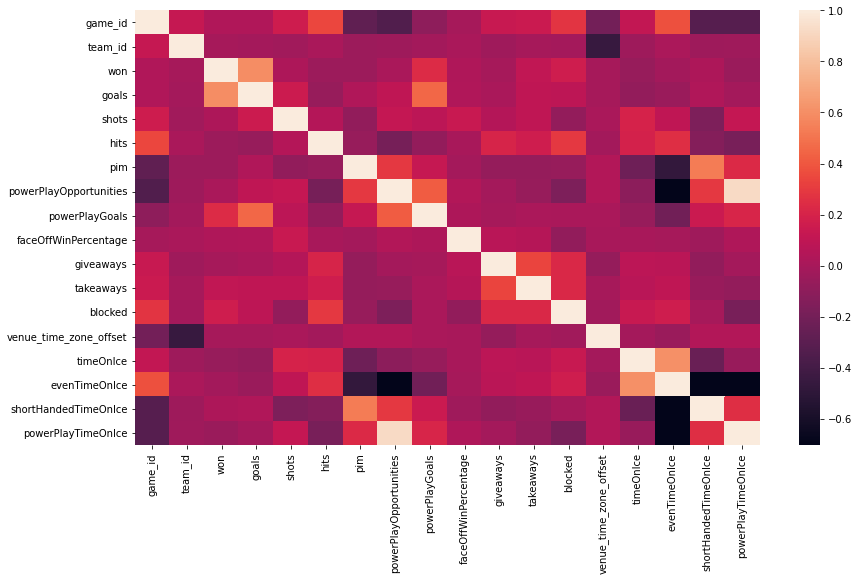

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr())


# Handling  missing values

### Check missing values

In [ ]:
def missing_values(data):
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(data.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
miss_values = missing_values(data)
miss_values.head(20)

# if there is no column with missing value > 70%. thus we need to impute the missing values

Dataframe has 31 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
faceOffWinPercentage,22148,42.1
takeaways,4928,9.4
hits,4928,9.4
blocked,4928,9.4
giveaways,4928,9.4
home_rink_side_start,2392,4.5
startRinkSide,2392,4.5
goalie_replacement,35,0.1
timeOnIce,28,0.1
evenTimeOnIce,28,0.1


In [ ]:
# ! pip install missingno

### Nullity Matrix

The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

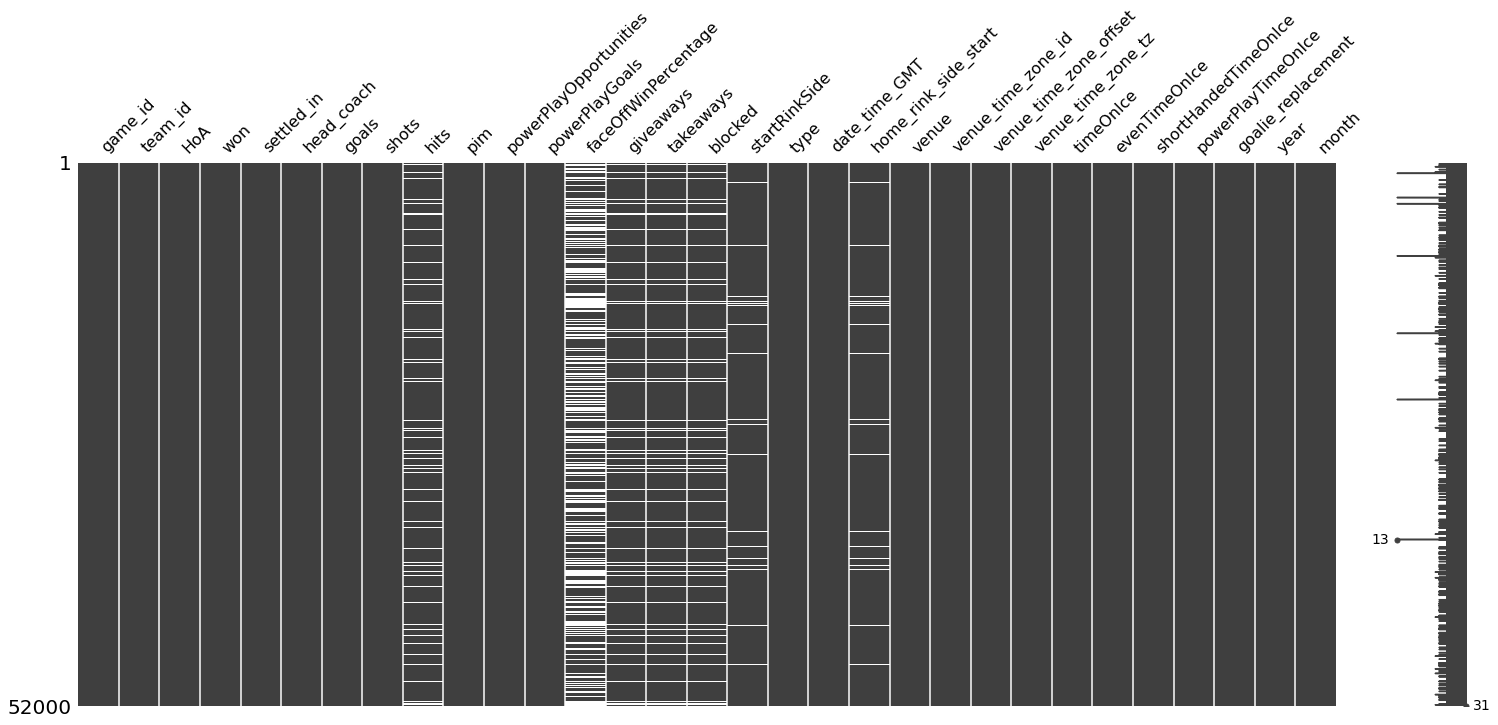

In [ ]:
import missingno as msno
ax = msno.matrix(data.sample(52000))

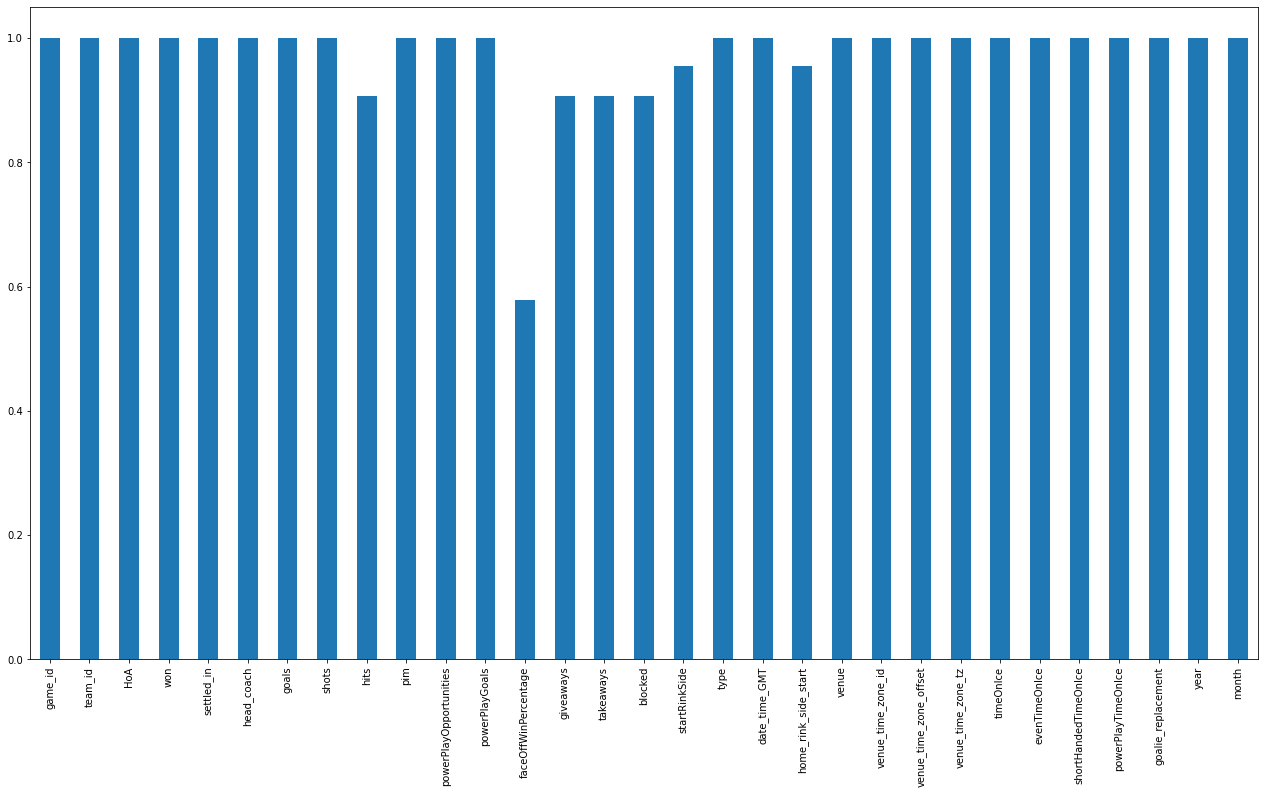

In [ ]:
fig, ax = plt.subplots(figsize=(22, 12))
(1 - data.isnull().mean()).abs().plot.bar(ax=ax)

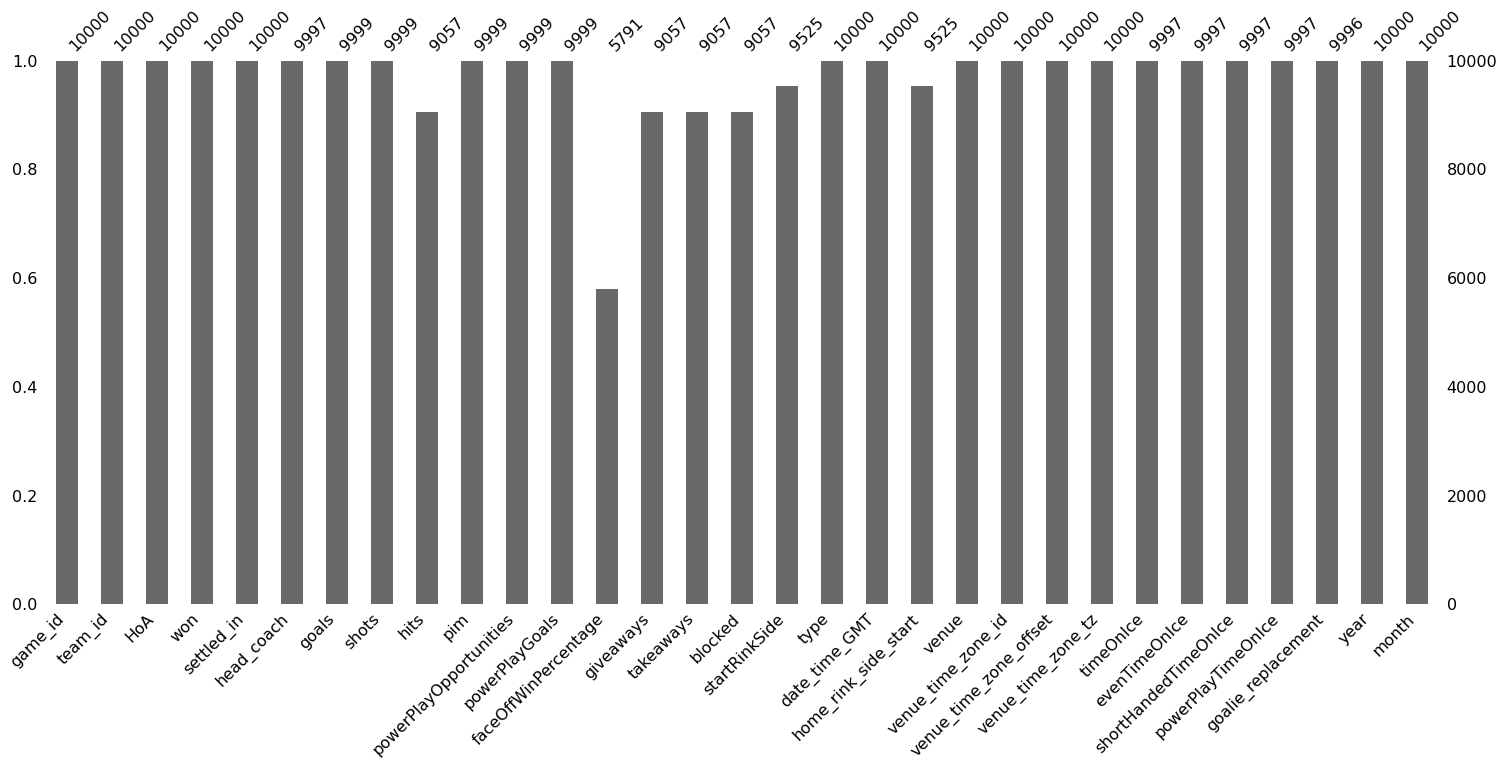

In [ ]:
ax = msno.bar(data.sample(10000))


### Missingno correlation heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

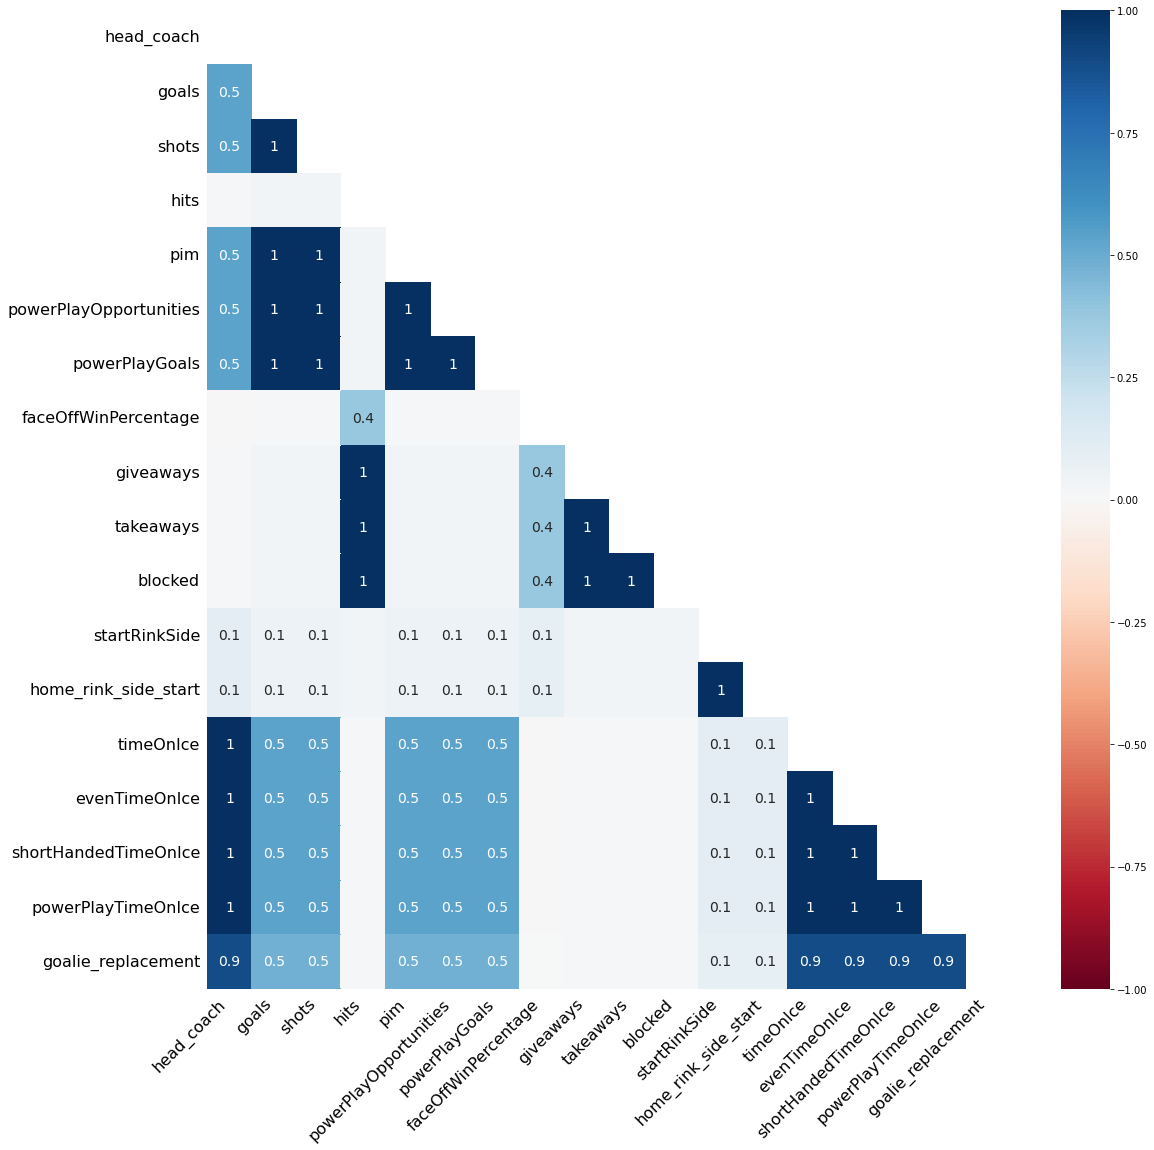

In [ ]:
ax = msno.heatmap(data, figsize=(18, 18))

### Dendogram
The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap

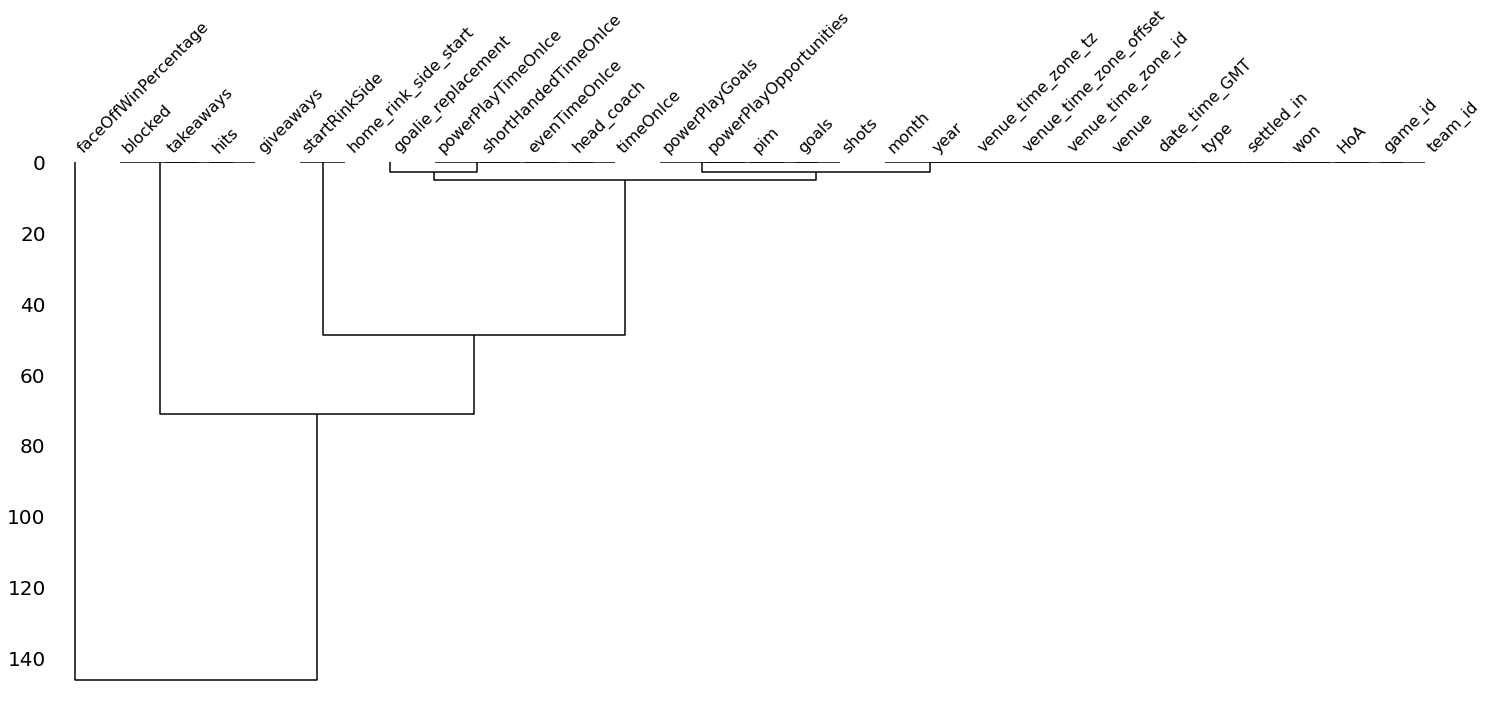

In [ ]:
ax = msno.dendrogram(data)

## Fill the numerical missing values
the numerical values imputed using median value

In [ ]:
data['faceOffWinPercentage'] = data['faceOffWinPercentage'].fillna(
    data['faceOffWinPercentage'].median())

data['takeaways'] = data['takeaways'].fillna(
    data['takeaways'].median())

data['hits'] = data['faceOffWinPercentage'].fillna(
    data['faceOffWinPercentage'].median())

data['blocked'] = data['blocked'].fillna(
    data['blocked'].median())

data['giveaways'] = data['giveaways'].fillna(
    data['giveaways'].median())

data['timeOnIce'] = data['timeOnIce'].fillna(
    data['timeOnIce'].median())

data['evenTimeOnIce'] = data['evenTimeOnIce'].fillna(
    data['evenTimeOnIce'].median())

data['shortHandedTimeOnIce'] = data['shortHandedTimeOnIce'].fillna(
    data['shortHandedTimeOnIce'].median())

data['powerPlayTimeOnIce'] = data['powerPlayTimeOnIce'].fillna(
    data['powerPlayTimeOnIce'].median())

data['powerPlayGoals'] = data['powerPlayGoals'].fillna(
    data['powerPlayGoals'].median())

data['powerPlayOpportunities'] = data['powerPlayOpportunities'].fillna(
    data['powerPlayOpportunities'].median())

data['pim'] = data['pim'].fillna(
    data['pim'].median())

data['goals'] = data['goals'].fillna(
    data['goals'].median())

data['shots'] = data['shots'].fillna(
    data['shots'].median())




In [ ]:
data.head(10)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,type,date_time_GMT,home_rink_side_start,venue,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalie_replacement,year,month
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,50.9,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,R,2016-10-19T00:30:00Z,right,United Center,America/Chicago,-5,CDT,990.833333,841.388889,55.555556,93.888889,Yes,2016,10
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,49.1,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,R,2016-10-19T00:30:00Z,right,United Center,America/Chicago,-5,CDT,981.333333,836.777778,75.111111,69.444444,No,2016,10
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,43.8,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right,R,2018-02-07T00:00:00Z,left,KeyBank Center,America/New_York,-4,EDT,1002.222222,879.611111,28.444444,94.166667,No,2018,02
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,56.2,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right,R,2018-02-07T00:00:00Z,left,KeyBank Center,America/New_York,-4,EDT,999.222222,888.333333,75.333333,35.555556,No,2018,02
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,45.7,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left,R,2015-11-24T01:00:00Z,right,MTS Centre,America/Winnipeg,-5,CDT,986.666667,844.722222,53.333333,88.611111,No,2015,11
5,2015020314,52,home,False,REG,Paul Maurice,1.0,21.0,54.3,11.0,2.0,0.0,54.3,13.0,7.0,9.0,left,R,2015-11-24T01:00:00Z,right,MTS Centre,America/Winnipeg,-5,CDT,986.722222,849.166667,70.888889,66.666667,No,2015,11
6,2015020849,52,away,False,REG,Paul Maurice,1.0,21.0,31.4,10.0,4.0,0.0,31.4,4.0,14.0,16.0,left,R,2016-02-17T00:00:00Z,right,PNC Arena,America/New_York,-4,EDT,974.333333,763.055556,107.111111,104.166667,No,2016,02
7,2015020849,12,home,True,REG,Bill Peters,2.0,29.0,68.6,8.0,5.0,2.0,68.6,12.0,11.0,13.0,left,R,2016-02-17T00:00:00Z,right,PNC Arena,America/New_York,-4,EDT,973.444444,756.222222,83.333333,133.888889,No,2016,02
8,2017020586,20,away,False,REG,Glen Gulutzan,1.0,23.0,54.7,19.0,3.0,0.0,54.7,10.0,4.0,7.0,right,R,2017-12-30T03:00:00Z,left,Honda Center,America/Los_Angeles,-7,PDT,974.166667,785.277778,114.444444,74.444444,No,2017,12
9,2017020586,24,home,True,REG,Randy Carlyle,2.0,41.0,45.3,13.0,6.0,1.0,45.3,13.0,4.0,21.0,right,R,2017-12-30T03:00:00Z,left,Honda Center,America/Los_Angeles,-7,PDT,979.611111,777.944444,59.555556,142.111111,No,2017,12


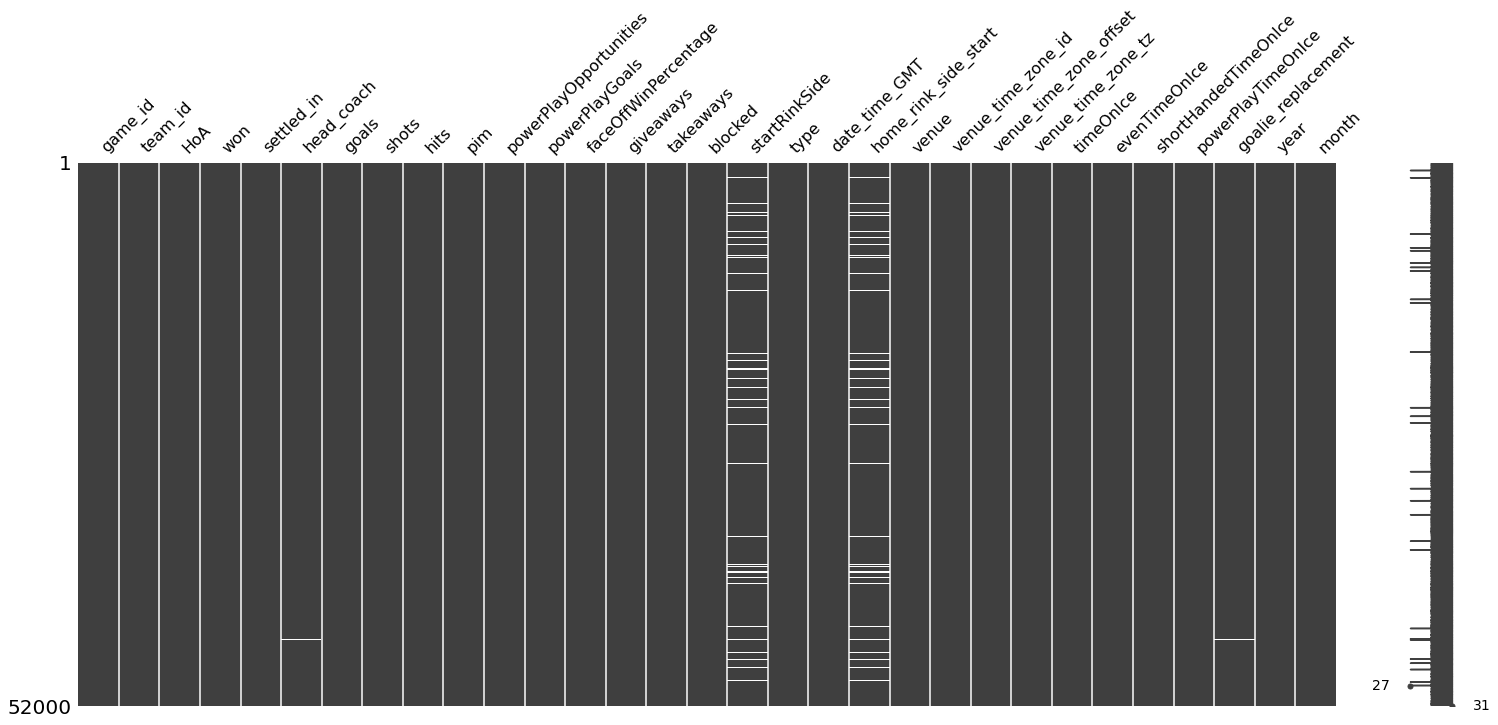

In [ ]:
ax = msno.matrix(data.sample(52000))

In [ ]:
data.isnull().sum()

game_id                      0
team_id                      0
HoA                          0
won                          0
settled_in                   0
head_coach                  28
goals                        0
shots                        0
hits                         0
pim                          0
powerPlayOpportunities       0
powerPlayGoals               0
faceOffWinPercentage         0
giveaways                    0
takeaways                    0
blocked                      0
startRinkSide             2392
type                         0
date_time_GMT                0
home_rink_side_start      2392
venue                        0
venue_time_zone_id           0
venue_time_zone_offset       0
venue_time_zone_tz           0
timeOnIce                    0
evenTimeOnIce                0
shortHandedTimeOnIce         0
powerPlayTimeOnIce           0
goalie_replacement          35
year                         0
month                        0
dtype: int64

In [ ]:
data.head_coach.head(5)

0        Dave Hakstol
1    Joel Quenneville
2       Randy Carlyle
3        Phil Housley
4         Patrick Roy
Name: head_coach, dtype: object

In [ ]:
# copy the dataframe
df= data.copy()

In [ ]:
df.isnull().sum()

game_id                      0
team_id                      0
HoA                          0
won                          0
settled_in                   0
head_coach                  28
goals                        0
shots                        0
hits                         0
pim                          0
powerPlayOpportunities       0
powerPlayGoals               0
faceOffWinPercentage         0
giveaways                    0
takeaways                    0
blocked                      0
startRinkSide             2392
type                         0
date_time_GMT                0
home_rink_side_start      2392
venue                        0
venue_time_zone_id           0
venue_time_zone_offset       0
venue_time_zone_tz           0
timeOnIce                    0
evenTimeOnIce                0
shortHandedTimeOnIce         0
powerPlayTimeOnIce           0
goalie_replacement          35
year                         0
month                        0
dtype: int64

In [ ]:
# fill the column with its own most frequent value
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))



In [ ]:
df.isnull().sum()

game_id                   0
team_id                   0
HoA                       0
won                       0
settled_in                0
head_coach                0
goals                     0
shots                     0
hits                      0
pim                       0
powerPlayOpportunities    0
powerPlayGoals            0
faceOffWinPercentage      0
giveaways                 0
takeaways                 0
blocked                   0
startRinkSide             0
type                      0
date_time_GMT             0
home_rink_side_start      0
venue                     0
venue_time_zone_id        0
venue_time_zone_offset    0
venue_time_zone_tz        0
timeOnIce                 0
evenTimeOnIce             0
shortHandedTimeOnIce      0
powerPlayTimeOnIce        0
goalie_replacement        0
year                      0
month                     0
dtype: int64

In [ ]:
df.head(10)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,type,date_time_GMT,home_rink_side_start,venue,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalie_replacement,year,month
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,50.9,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,R,2016-10-19T00:30:00Z,right,United Center,America/Chicago,-5,CDT,990.833333,841.388889,55.555556,93.888889,Yes,2016,10
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,49.1,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,R,2016-10-19T00:30:00Z,right,United Center,America/Chicago,-5,CDT,981.333333,836.777778,75.111111,69.444444,No,2016,10
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,43.8,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right,R,2018-02-07T00:00:00Z,left,KeyBank Center,America/New_York,-4,EDT,1002.222222,879.611111,28.444444,94.166667,No,2018,02
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,56.2,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right,R,2018-02-07T00:00:00Z,left,KeyBank Center,America/New_York,-4,EDT,999.222222,888.333333,75.333333,35.555556,No,2018,02
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,45.7,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left,R,2015-11-24T01:00:00Z,right,MTS Centre,America/Winnipeg,-5,CDT,986.666667,844.722222,53.333333,88.611111,No,2015,11
5,2015020314,52,home,False,REG,Paul Maurice,1.0,21.0,54.3,11.0,2.0,0.0,54.3,13.0,7.0,9.0,left,R,2015-11-24T01:00:00Z,right,MTS Centre,America/Winnipeg,-5,CDT,986.722222,849.166667,70.888889,66.666667,No,2015,11
6,2015020849,52,away,False,REG,Paul Maurice,1.0,21.0,31.4,10.0,4.0,0.0,31.4,4.0,14.0,16.0,left,R,2016-02-17T00:00:00Z,right,PNC Arena,America/New_York,-4,EDT,974.333333,763.055556,107.111111,104.166667,No,2016,02
7,2015020849,12,home,True,REG,Bill Peters,2.0,29.0,68.6,8.0,5.0,2.0,68.6,12.0,11.0,13.0,left,R,2016-02-17T00:00:00Z,right,PNC Arena,America/New_York,-4,EDT,973.444444,756.222222,83.333333,133.888889,No,2016,02
8,2017020586,20,away,False,REG,Glen Gulutzan,1.0,23.0,54.7,19.0,3.0,0.0,54.7,10.0,4.0,7.0,right,R,2017-12-30T03:00:00Z,left,Honda Center,America/Los_Angeles,-7,PDT,974.166667,785.277778,114.444444,74.444444,No,2017,12
9,2017020586,24,home,True,REG,Randy Carlyle,2.0,41.0,45.3,13.0,6.0,1.0,45.3,13.0,4.0,21.0,right,R,2017-12-30T03:00:00Z,left,Honda Center,America/Los_Angeles,-7,PDT,979.611111,777.944444,59.555556,142.111111,No,2017,12


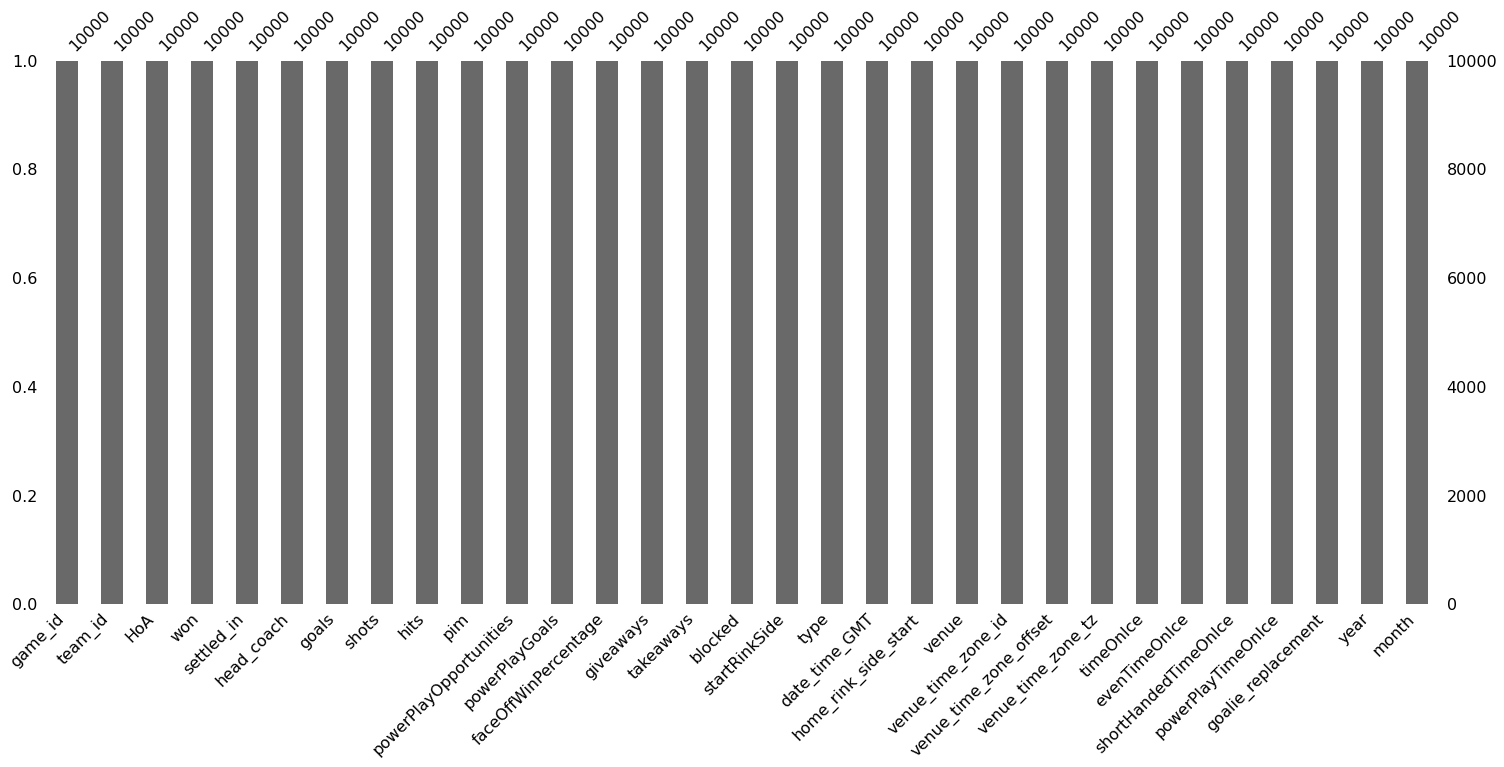

In [ ]:
ax = msno.bar(df.sample(10000))



## Create Target Variable
Convert the boolean to integer 

In [ ]:
df["won"] = df["won"].astype(int)


In [ ]:
df['won'].value_counts()

0    26947
1    25663
Name: won, dtype: int64

In [ ]:
df.head(6)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,type,date_time_GMT,home_rink_side_start,venue,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalie_replacement,year,month
0,2016020045,4,away,0,REG,Dave Hakstol,4.0,27.0,50.9,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,R,2016-10-19T00:30:00Z,right,United Center,America/Chicago,-5,CDT,990.833333,841.388889,55.555556,93.888889,Yes,2016,10
1,2016020045,16,home,1,REG,Joel Quenneville,7.0,28.0,49.1,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,R,2016-10-19T00:30:00Z,right,United Center,America/Chicago,-5,CDT,981.333333,836.777778,75.111111,69.444444,No,2016,10
2,2017020812,24,away,1,OT,Randy Carlyle,4.0,34.0,43.8,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right,R,2018-02-07T00:00:00Z,left,KeyBank Center,America/New_York,-4,EDT,1002.222222,879.611111,28.444444,94.166667,No,2018,02
3,2017020812,7,home,0,OT,Phil Housley,3.0,33.0,56.2,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right,R,2018-02-07T00:00:00Z,left,KeyBank Center,America/New_York,-4,EDT,999.222222,888.333333,75.333333,35.555556,No,2018,02
4,2015020314,21,away,1,REG,Patrick Roy,4.0,29.0,45.7,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left,R,2015-11-24T01:00:00Z,right,MTS Centre,America/Winnipeg,-5,CDT,986.666667,844.722222,53.333333,88.611111,No,2015,11
5,2015020314,52,home,0,REG,Paul Maurice,1.0,21.0,54.3,11.0,2.0,0.0,54.3,13.0,7.0,9.0,left,R,2015-11-24T01:00:00Z,right,MTS Centre,America/Winnipeg,-5,CDT,986.722222,849.166667,70.888889,66.666667,No,2015,11


In [ ]:
corr = df.corr()['won'].sort_values()

# Display correlations
print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
hits                    0.023102
faceOffWinPercentage    0.023102
shots                   0.025197
shortHandedTimeOnIce    0.027572
game_id                 0.035644
takeaways               0.101526
blocked                 0.158984
powerPlayGoals          0.240915
goals                   0.596595
won                     1.000000
Name: won, dtype: float64

Top 10 - Negative Correlations:
------------------------------
timeOnIce                -0.061069
powerPlayTimeOnIce       -0.046904
pim                      -0.040199
evenTimeOnIce            -0.014485
giveaways                -0.003083
venue_time_zone_offset   -0.001869
team_id                  -0.001185
powerPlayOpportunities    0.014103
hits                      0.023102
faceOffWinPercentage      0.023102
Name: won, dtype: float64


[Text(0.5, 0, 'game_id'),
 Text(1.5, 0, 'team_id'),
 Text(2.5, 0, 'won'),
 Text(3.5, 0, 'goals'),
 Text(4.5, 0, 'shots'),
 Text(5.5, 0, 'hits'),
 Text(6.5, 0, 'pim'),
 Text(7.5, 0, 'powerPlayOpportunities'),
 Text(8.5, 0, 'powerPlayGoals'),
 Text(9.5, 0, 'faceOffWinPercentage'),
 Text(10.5, 0, 'giveaways'),
 Text(11.5, 0, 'takeaways'),
 Text(12.5, 0, 'blocked'),
 Text(13.5, 0, 'venue_time_zone_offset'),
 Text(14.5, 0, 'timeOnIce'),
 Text(15.5, 0, 'evenTimeOnIce'),
 Text(16.5, 0, 'shortHandedTimeOnIce'),
 Text(17.5, 0, 'powerPlayTimeOnIce')]

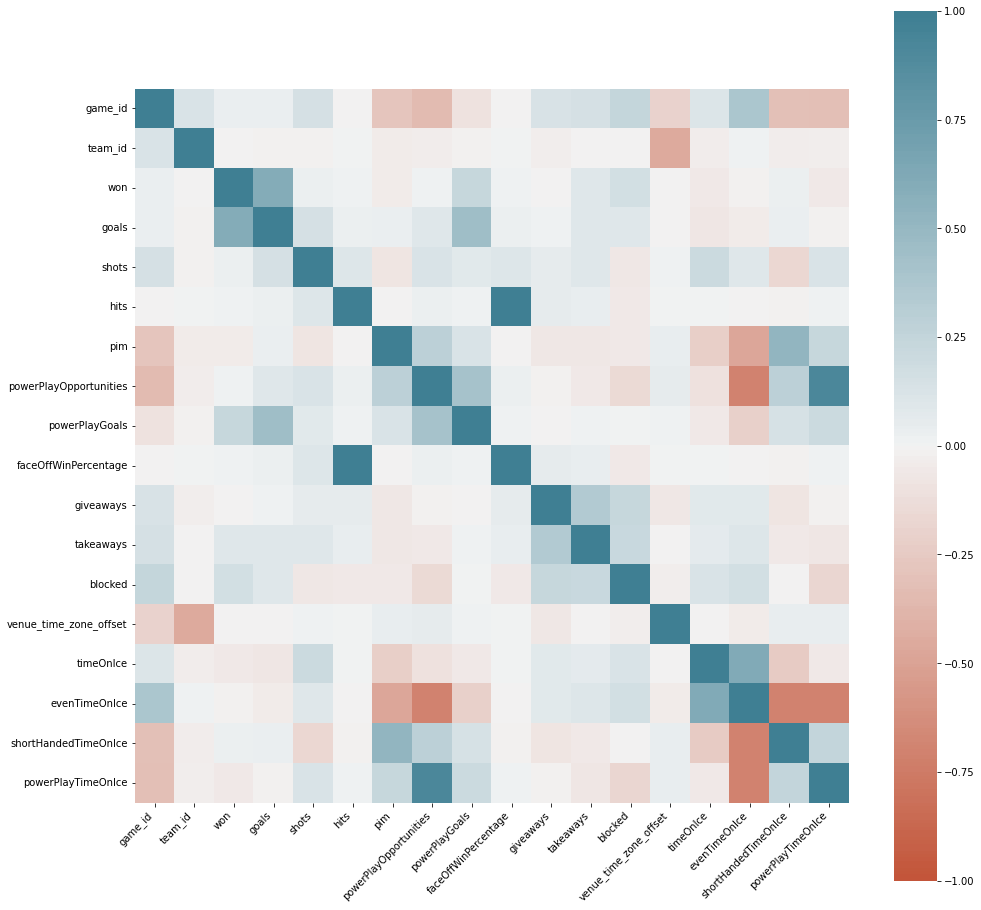

In [ ]:
correlation = df.corr()
plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)



## Insights
* **Positive Correlations** :

    * there is positive correlation between powerPlayTimeonice and powerPlayOpportunities 
    * there is positive correlation between faceOffWinPercentage and hits

* **Negative Correlations**:

    * there is negative correlation evenTimeOnIce and powerPlayOpportunities
    * there is negative correlation evenTimeOnIce and powerPlayTimeonice
    * there is negative correlation evenTimeOnIce and shortHandedTimeOnIce
    

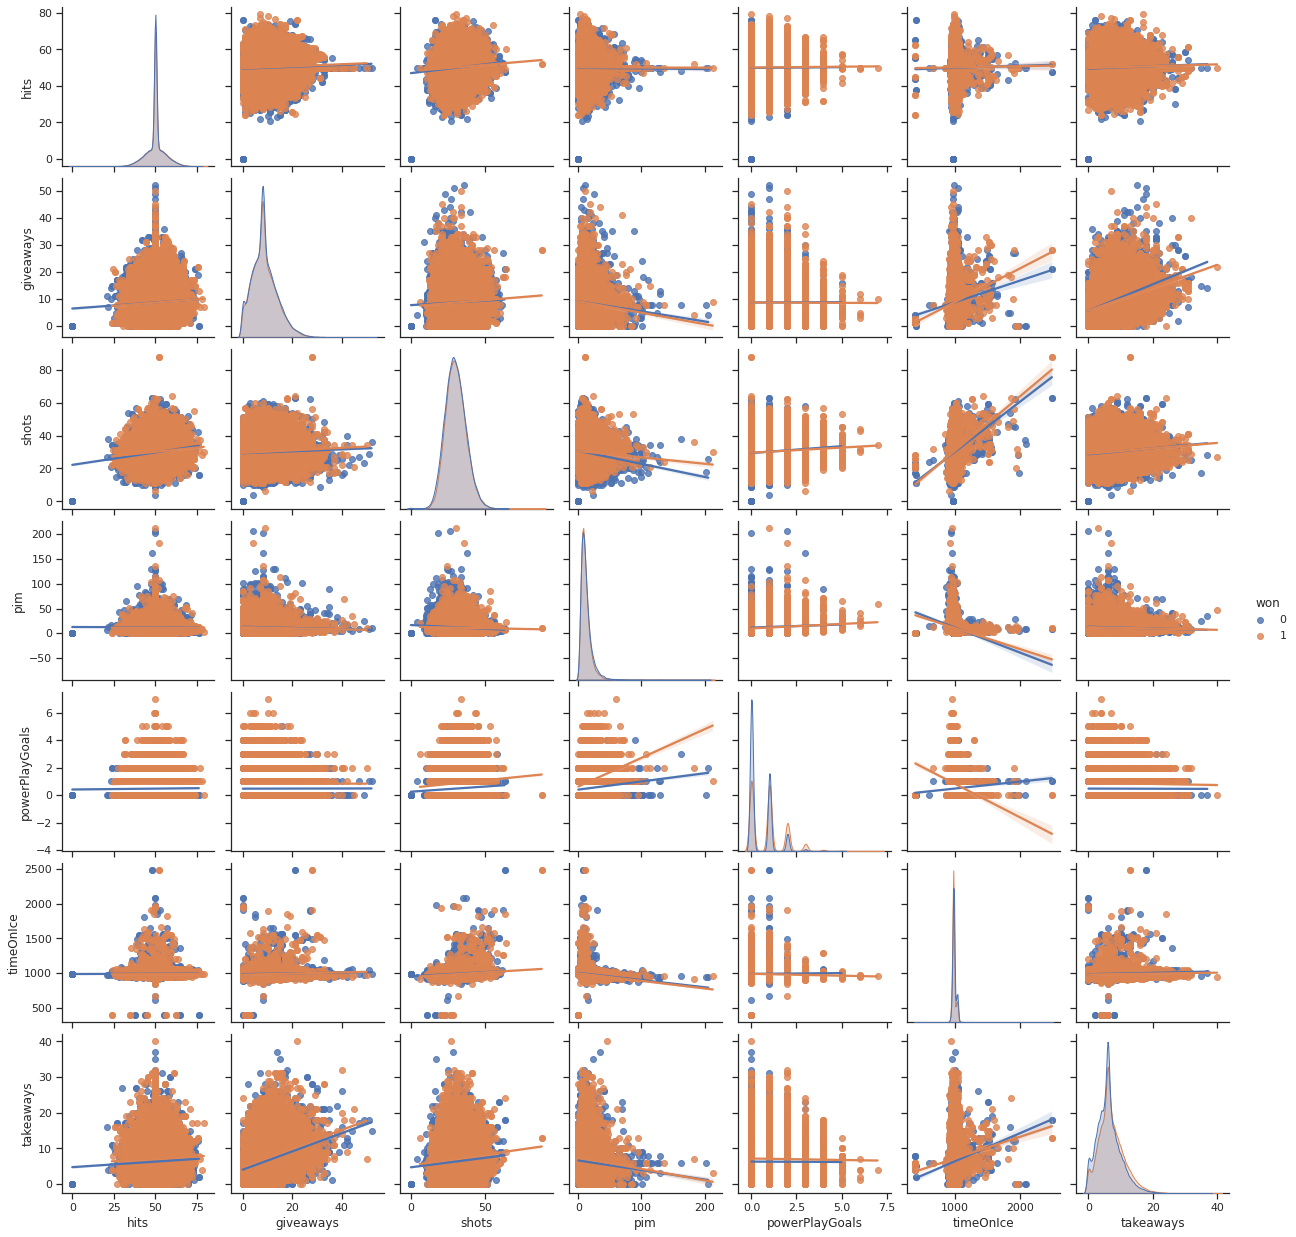

In [ ]:
from seaborn import pairplot


sns.set(style="ticks")

vars= ["hits", "giveaways", "shots","pim","powerPlayGoals","timeOnIce","takeaways"]

p = pairplot(
    df, vars=vars, hue="won", kind="reg"
)



## Count of columns with specific data types


Text(0, 0.5, 'Data type')

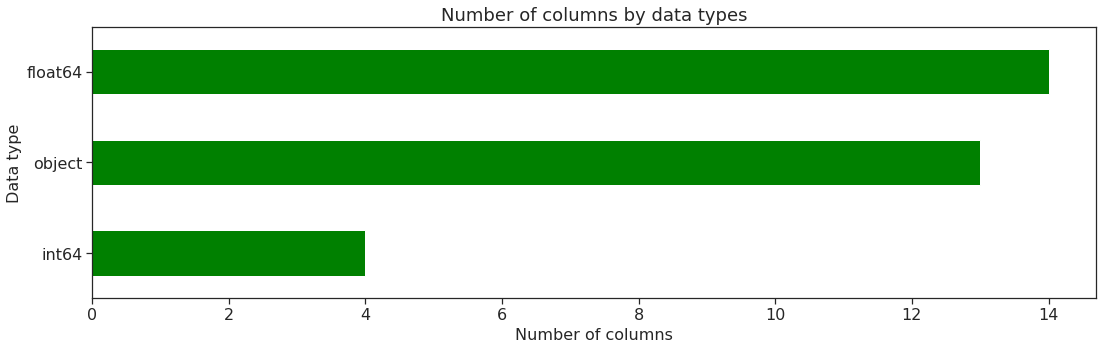

In [ ]:
df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(18, 5),
                                            fontsize=16,
                                           color="green")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

## Count number of categories for each object data 
We will need to deal with categorical data

In [ ]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

HoA                         2
settled_in                  3
head_coach                146
startRinkSide               2
type                        3
date_time_GMT           14468
home_rink_side_start        2
venue                     116
venue_time_zone_id         11
venue_time_zone_tz          8
goalie_replacement          2
year                       21
month                      11
dtype: int64

## Distribution of Categorical Variables


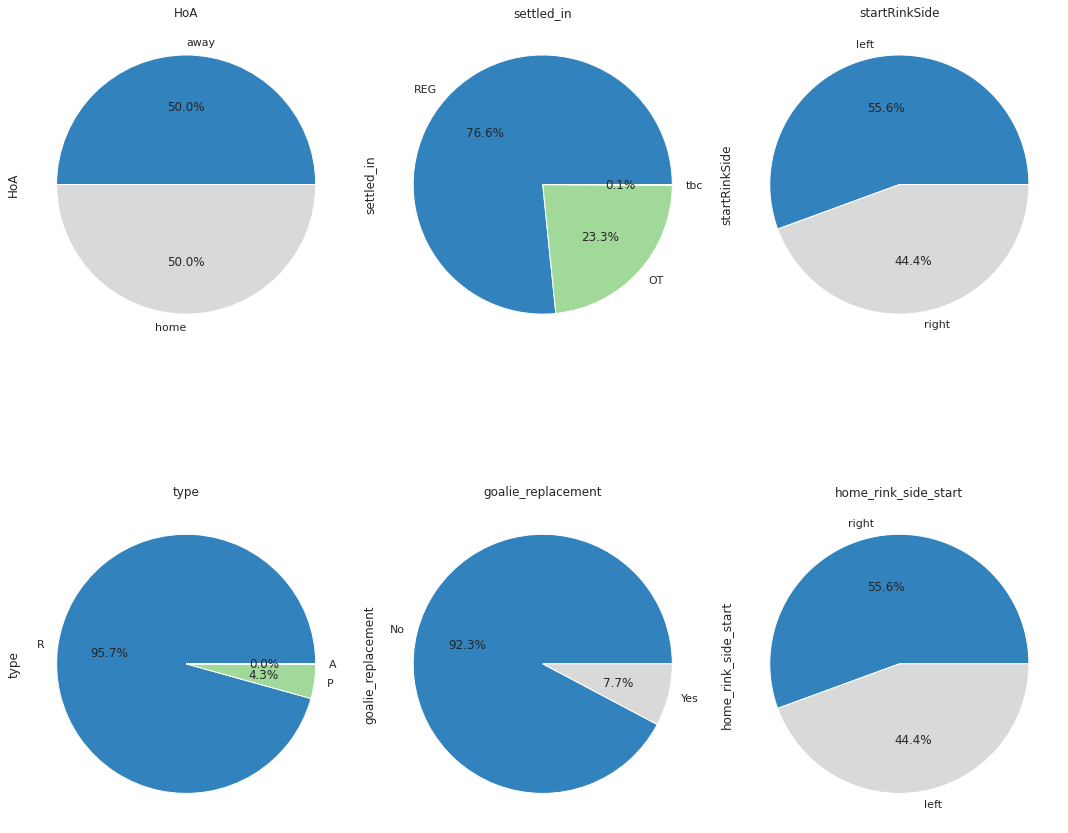

In [ ]:
cat_vars = df[['HoA','settled_in','startRinkSide','type','goalie_replacement','home_rink_side_start']]
#cat_vars.columns

fig, axes = plt.subplots(round(len(cat_vars.columns) / 4), 3, figsize=(15, 15))

for i, ax in enumerate(fig.axes):
    if i < len(cat_vars.columns):
        cat_vars[cat_vars.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax, colormap='tab20c')
        ax.set_title(cat_vars.columns[i])

fig.tight_layout();

In [ ]:
# Plotting 3-D  {powerPlayGoals, won, shots}

fig = px.scatter_3d(df, x="powerPlayGoals", y="won", z="shots", color="goals")
fig.show()

In [ ]:
# check  time spent on the ice impacts the outcome of the game

px.scatter(df, x = 'timeOnIce', y="shots", color = 'won', title='The Impact of Time Spent On The Ice',height=700)



# Data Clean up
Drop the features that are not usefull for the model.

In [ ]:
df.columns

Index(['game_id', 'team_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals',
       'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked',
       'startRinkSide', 'type', 'date_time_GMT', 'home_rink_side_start',
       'venue', 'venue_time_zone_id', 'venue_time_zone_offset',
       'venue_time_zone_tz', 'timeOnIce', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'goalie_replacement',
       'year', 'month'],
      dtype='object')

In [ ]:
df.drop(['game_id', 'team_id', 'venue_time_zone_id', 'date_time_GMT', 'venue_time_zone_offset','venue_time_zone_tz','head_coach','venue'],
        axis=1,
        inplace=True)

In [ ]:
df.columns

Index(['HoA', 'won', 'settled_in', 'goals', 'shots', 'hits', 'pim',
       'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage',
       'giveaways', 'takeaways', 'blocked', 'startRinkSide', 'type',
       'home_rink_side_start', 'timeOnIce', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'goalie_replacement',
       'year', 'month'],
      dtype='object')

In [ ]:
# remove correlated variables

df.drop(['powerPlayOpportunities','faceOffWinPercentage','evenTimeOnIce'], axis=1, inplace=True)

In [ ]:
df.shape

(52610, 20)

## Categorical Encodings
one-hot encoding is used for categorical encoding. There is no need to use label encoding because there is no ordinal variables in the dataset.

In [ ]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

HoA                      2
settled_in               3
startRinkSide            2
type                     3
home_rink_side_start     2
goalie_replacement       2
year                    21
month                   11
dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['HoA','settled_in', 'startRinkSide','type','home_rink_side_start','goalie_replacement'])


print(df.shape)



(52610, 28)


In [ ]:
df.head(6)

,won,goals,shots,hits,pim,powerPlayGoals,giveaways,takeaways,blocked,timeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,year,month,HoA_away,HoA_home,settled_in_OT,settled_in_REG,settled_in_tbc,startRinkSide_left,startRinkSide_right,type_A,type_P,type_R,home_rink_side_start_left,home_rink_side_start_right,goalie_replacement_No,goalie_replacement_Yes
0,0,4.0,27.0,50.9,6.0,2.0,12.0,9.0,11.0,990.833333,55.555556,93.888889,2016,10,1,0,0,1,0,1,0,0,0,1,0,1,0,1
1,1,7.0,28.0,49.1,8.0,2.0,16.0,8.0,9.0,981.333333,75.111111,69.444444,2016,10,0,1,0,1,0,1,0,0,0,1,0,1,1,0
2,1,4.0,34.0,43.8,6.0,1.0,7.0,4.0,14.0,1002.222222,28.444444,94.166667,2018,02,1,0,1,0,0,0,1,0,0,1,1,0,1,0
3,0,3.0,33.0,56.2,8.0,1.0,5.0,6.0,14.0,999.222222,75.333333,35.555556,2018,02,0,1,1,0,0,0,1,0,0,1,1,0,1,0
4,1,4.0,29.0,45.7,9.0,1.0,13.0,5.0,20.0,986.666667,53.333333,88.611111,2015,11,1,0,0,1,0,1,0,0,0,1,0,1,1,0
5,0,1.0,21.0,54.3,11.0,0.0,13.0,7.0,9.0,986.722222,70.888889,66.666667,2015,11,0,1,0,1,0,1,0,0,0,1,0,1,1,0


## Outliers check

Text(0, 0.5, 'Values')

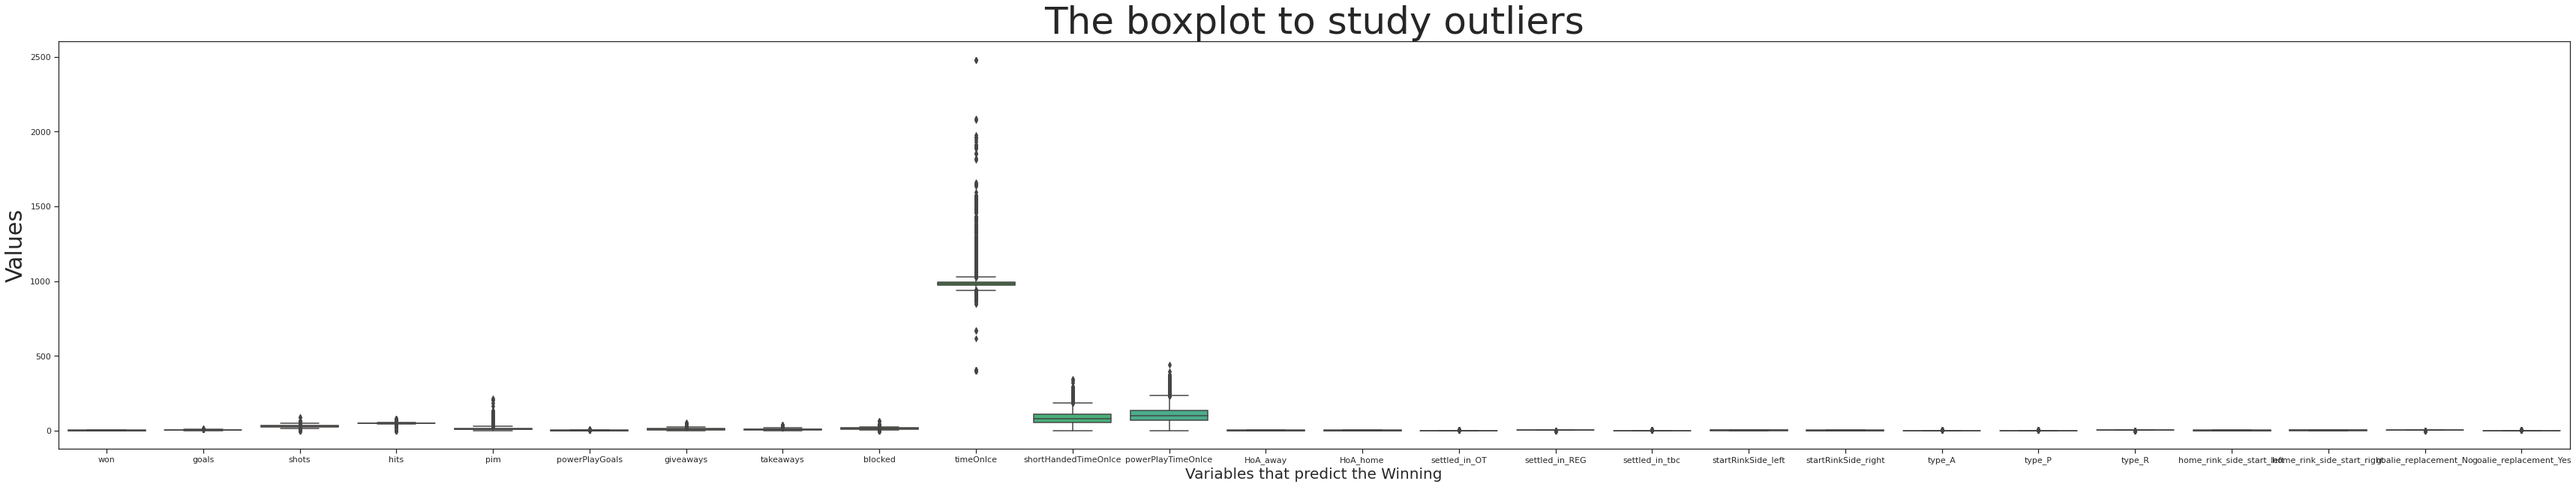

In [ ]:
# outliers check

plt.figure(figsize=(60,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers',fontsize=50)
plt.xlabel('Variables that predict the Winning',fontsize=20)
plt.ylabel('Values',fontsize=30)

In [ ]:
# most outlier variables located in the  "timeOnIce","shortHandedTimeOnIce","powerPlayTimeOnIce"

In [ ]:
from sklearn.ensemble import IsolationForest # Return the anomaly score 

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(df)
score = iforest.decision_function(df)

from numpy import where
anom_index = where(pred== -1)
values = df.iloc[anom_index]
values

X does not have valid feature names, but IsolationForest was fitted with feature names


,won,goals,shots,hits,pim,powerPlayGoals,giveaways,takeaways,blocked,timeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,year,month,HoA_away,HoA_home,settled_in_OT,settled_in_REG,settled_in_tbc,startRinkSide_left,startRinkSide_right,type_A,type_P,type_R,home_rink_side_start_left,home_rink_side_start_right,goalie_replacement_No,goalie_replacement_Yes
122,1,5.0,25.0,41.5,4.0,0.0,14.0,5.0,12.0,1043.222222,29.777778,102.666667,2017,01,0,1,1,0,0,1,0,0,0,1,0,1,0,1
273,0,3.0,29.0,39.1,96.0,0.0,10.0,8.0,16.0,954.888889,65.888889,114.777778,2016,11,1,0,0,1,0,1,0,0,0,1,0,1,0,1
274,1,6.0,42.0,60.9,75.0,1.0,10.0,10.0,13.0,956.833333,91.777778,90.666667,2016,11,0,1,0,1,0,1,0,0,0,1,0,1,0,1
457,1,3.0,44.0,58.1,6.0,1.0,4.0,0.0,9.0,1010.666667,30.666667,75.555556,2016,02,1,0,1,0,0,1,0,0,0,1,0,1,0,1
719,1,3.0,41.0,71.8,40.0,2.0,5.0,2.0,15.0,950.000000,84.222222,112.333333,2017,04,0,1,0,1,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52565,0,4.0,32.0,52.3,2.0,1.0,9.0,13.0,24.0,1083.055556,26.666667,16.666667,2019,05,0,1,1,0,0,0,1,0,1,0,1,0,1,0
52590,1,7.0,24.0,55.6,16.0,4.0,4.0,11.0,19.0,959.666667,103.388889,35.000000,2019,06,1,0,0,1,0,0,1,0,1,0,1,0,1,0
52591,0,2.0,29.0,44.4,14.0,1.0,7.0,11.0,7.0,990.777778,28.000000,130.388889,2019,06,0,1,0,1,0,0,1,0,1,0,1,0,0,1
52592,1,7.0,24.0,55.6,16.0,4.0,4.0,11.0,19.0,959.666667,103.388889,35.000000,2019,06,1,0,0,1,0,0,1,0,1,0,1,0,1,0


In [ ]:
# there were 1053 outiliers detected

values.shape

(1053, 28)

In [ ]:
# the remove the outliers detected

df = df[~df.index.isin(values.index)]
df.shape

(51557, 28)

## Feature selection

In [ ]:
from sklearn.model_selection import train_test_split
# define x and y

X, y = df.drop(['won'], axis=1), df.won

# split the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)




In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=0)

model = randomforest.fit(X_train,y_train)

model.feature_importances_

pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")

,predictor,feature importance
20,type_A,0.000000
17,settled_in_tbc,0.000042
21,type_P,0.001761
22,type_R,0.001810
18,startRinkSide_left,0.004538
19,startRinkSide_right,0.004607
23,home_rink_side_start_left,0.004637
24,home_rink_side_start_right,0.004686
13,HoA_away,0.005719
14,HoA_home,0.005739


##  Insights:

the least important predictors should be removed

* **type_A**

* **settled_in_tbc**

* **type_P**

* **type_R** 


In [ ]:
X_train = X_train.drop(['type_A'], axis=1)
X_train = X_train.drop(['settled_in_tbc'], axis=1)
X_train = X_train.drop(['type_P'], axis=1)
X_train = X_train.drop(['type_R'], axis=1)

X_test= X_test.drop(['type_A'], axis=1)
X_test= X_test.drop(['settled_in_tbc'], axis=1)
X_test= X_test.drop(['type_P'], axis=1)
X_test= X_test.drop(['type_R'], axis=1)







In [ ]:
# standarize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc= scaler.fit_transform(X_test)

# Modeling